#Question 3: Band-Reject Filter

##1- Loading the Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


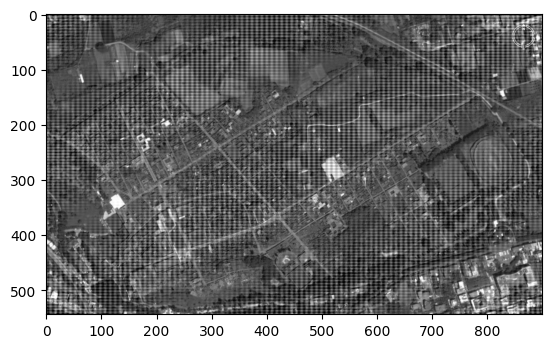

In [ ]:
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_file = '/content/drive/My Drive/Assignment-2/q3_pompeii.png'

# Load the image
pompeii = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

plt.imshow(pompeii, cmap="gray")

##2- Taking the Fourier Transform of the Image

Noise present in the image is periodic, meaning that we can discard the noise by using frequency based methods.

The method that this solution applies is:
* Taking the Fourier transform of the image
* Spot the frequencies that cause the noise
* Create a band-reject filter to get rid of those frequencies
* Apply the filter and go back to spatial representation

The part below takes the Fourier Transform of the image.

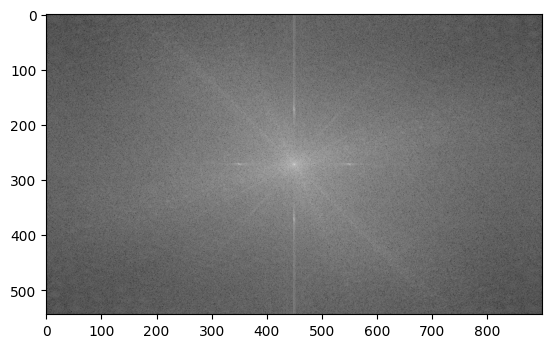

In [ ]:
f = np.fft.fft2(pompeii)
f = np.fft.fftshift(f)
img_freq_domain = 20*np.log(np.abs(f))

plt.imshow(img_freq_domain, cmap="gray")

###Ideal Filter

The code below implements the ideal band-reject filter. What it does is basically abruptly cutting out the frequencies that are within a specific range, by assigning the amplitude of these frequencies 0.

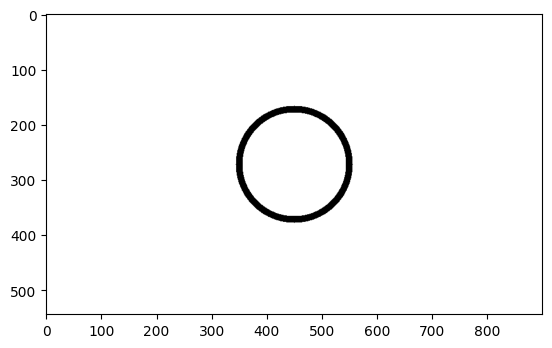

In [ ]:
row, col = f.shape
H_ideal = np.zeros((row, col), dtype=np.float32)

D0 = 100
W = 12

for u in range(row):
  for v in range(col):
    D = np.sqrt((u - row/2)**2 + (v - col/2)**2)

    # Assign zero as amplitude to the frequencies that are in the range defined by D0 and W
    if (D0 - W/2) <= D <= (D0 + W/2):
      H_ideal[u,v] = 0
    else:
      H_ideal[u,v] = 1

plt.imshow(H_ideal, cmap="gray")

Code below applies the filter to the frequency representation and the converts it back to spatial represenation via inverse Fourier Transform.

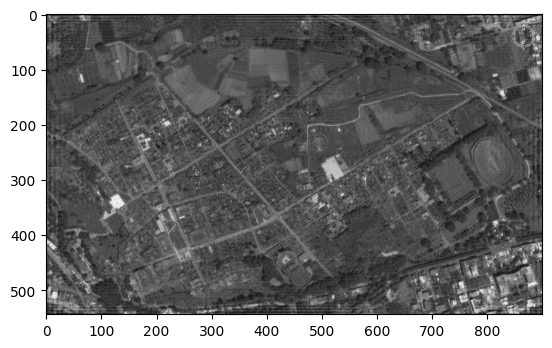

In [ ]:
filtered_img = np.multiply(f, H_ideal) # Apply the filter
 # Inverse transform
filtered_shift = np.fft.ifftshift(filtered_img)
filtered_img_spatial = np.fft.ifft2(filtered_shift)
filtered_img_spatial = np.abs(filtered_img_spatial)

plt.imshow(filtered_img_spatial, cmap="gray")

 We can try another filter, Gaussian, to eliminate the possible ringing effect. Code below implements the Gaussian Band-reject filter.

###Gaussian Filter

<ipython-input-130-0ac19b018c4a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  H_gauss[u,v] = 1 - np.exp(-1*(((D**2 - D0**2)/(D*W))**2))


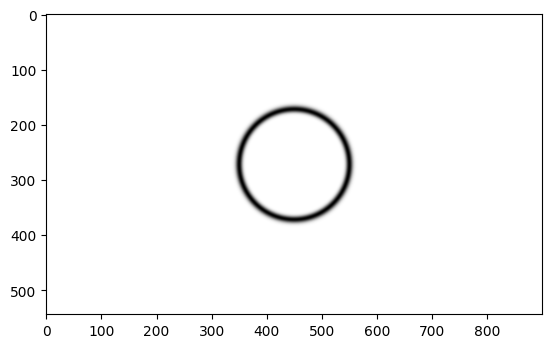

In [ ]:
H_gauss = np.zeros((row, col), dtype=np.float32)

D0 = 100
W = 12

for u in range(row):
  for v in range(col):
    D = np.sqrt((u - row/2)**2 + (v - col/2)**2)
    H_gauss[u,v] = 1 - np.exp(-1*(((D**2 - D0**2)/(D*W))**2))

plt.imshow(H_gauss, cmap="gray")

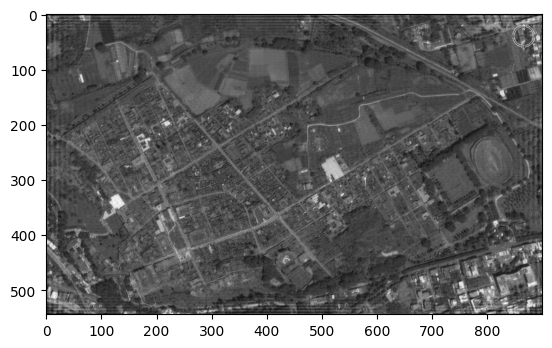

In [ ]:
gauss_filtered_img = np.multiply(f, H_gauss)
gauss_filtered_shift = np.fft.ifftshift(gauss_filtered_img)
gauss_filtered_img_spatial = np.fft.ifft2(gauss_filtered_shift)
gauss_filtered_img_spatial = np.abs(gauss_filtered_img_spatial)

plt.imshow(gauss_filtered_img_spatial, cmap="gray")